In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Downloading passenger data

In [3]:
sel_mun = ["Albertslund","Ballerup","Brøndby","Dragør","Frederiksberg","Gentofte","Gladsaxe",
                           "Glostrup","Herlev","Hvidovre","Høje-Taastrup","Ishøj","København",
                           "Rødovre","Tårnby","Vallensbæk"]

In [4]:
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Transport_vs_covid19/Data/' + 'Passagertal_SenesteVersion.csv'

df = pd.read_csv(path,sep=";",
                 thousands=",")


In [5]:
df.head(50)

,Kommune,Stopnr,Linje,Retn.,Stopnavn,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003
0,Rødovre,100.0,200S,1.0,Fortvej,74.0,49.0,100.0,96.0,122.0,42.0,46.0,23.0
1,Tårnby,1000.0,34,1.0,Amagerhallen,0.0,38.0,11.0,7.0,1.0,18.0,0.0,8.0
2,København,10004.0,26,1.0,Langeliniekaj (Midt),6.0,37.0,3.0,32.0,NaN,NaN,NaN,NaN
3,København,10004.0,27,1.0,Langeliniekaj (Midt),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,København,10004.0,27,2.0,Langeliniekaj (Midt),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
5,København,10005.0,26,1.0,Langeliniekaj (Østmolen),0.0,43.0,0.0,56.0,NaN,NaN,NaN,NaN
6,København,10005.0,26,2.0,Langeliniekaj (Østmolen),41.0,1.0,51.0,1.0,NaN,NaN,NaN,NaN
7,København,10005.0,27,1.0,Langeliniekaj (Østmolen),NaN,NaN,NaN,NaN,0.0,0.0,16.0,0.0
8,København,10005.0,27,2.0,Langeliniekaj (Østmolen),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
9,København,10006.0,26,2.0,Langeliniekaj,10.0,0.0,11.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df_temp = df[df.Kommune.isin(["Vallensbæk"])].copy()

df_temp["dif_2020"] = (df.På_202002 - df.På_202003)

df_temp["vægtet_dif"] = df_temp.dif_2020 * (df_temp.På_202002/df_temp.På_202002.sum())

df_temp = df_temp.sort_values("vægtet_dif",ascending=False)

df_temp.head(50)


#df[df.På_202002 ].groupby("Kommune").size()

#df[np.isnan(df.På_202003)].groupby("Kommune").size()

,Kommune,Stopnr,Linje,Retn.,Stopnavn,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003,dif_2020,vægtet_dif
6833,Vallensbæk,4703.0,300S,2.0,Vejlegårdsparken,162.0,83.0,178.0,61.0,186.0,52.0,86.0,26.0,100.0,16.159861
6834,Vallensbæk,4703.0,30E,2.0,Vejlegårdsparken,128.0,25.0,150.0,22.0,138.0,19.0,73.0,13.0,65.0,7.793223
10849,Vallensbæk,6955.0,143,2.0,Vallensbæk st.,70.0,0.0,86.0,0.0,104.0,0.0,87.0,0.0,17.0,1.536056
10673,Vallensbæk,6772.0,166,2.0,Vallensbæk st.,95.0,0.0,102.0,0.0,124.0,0.0,112.0,1.0,12.0,1.292789
6835,Vallensbæk,4704.0,300S,1.0,Vejlegårdsparken,64.0,167.0,35.0,161.0,48.0,188.0,28.0,118.0,20.0,0.834057
10833,Vallensbæk,6948.0,144,1.0,Bygaden,5.0,1.0,3.0,3.0,33.0,9.0,20.0,4.0,13.0,0.372719
10816,Vallensbæk,6941.0,143,1.0,Skolestien,17.0,9.0,13.0,17.0,28.0,6.0,14.0,2.0,14.0,0.340573
6836,Vallensbæk,4704.0,30E,1.0,Vejlegårdsparken,28.0,96.0,32.0,102.0,26.0,86.0,11.0,55.0,15.0,0.338836
6286,Vallensbæk,44312.0,144,1.0,Firkløverparken,3.0,9.0,4.0,6.0,26.0,5.0,11.0,2.0,15.0,0.338836
7776,Vallensbæk,51.0,300S,2.0,Vejlegårdsvej,28.0,29.0,24.0,27.0,29.0,29.0,20.0,6.0,9.0,0.226759


In [7]:
df_201902 = df[["Kommune","På_201902","Af_201902"]].dropna()
df_201903 = df[["Kommune","På_201903","Af_201903"]].dropna()
df_202002 = df[["Kommune","På_202002","Af_202002"]].dropna()
df_202003 = df[["Kommune","På_202003","Af_202003"]].dropna()


(array([7923., 1401.,  727.,  421.,  315.,  219.,  160.,  125.,  106.,
          93.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

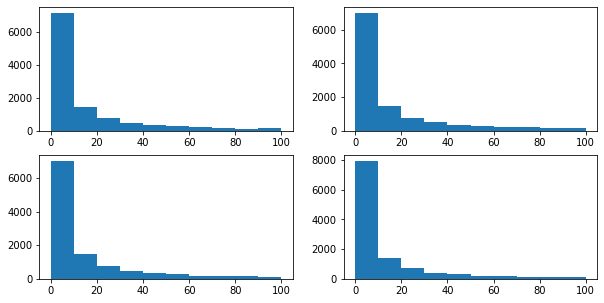

In [8]:
df_temp1 = df_201902.copy()[df_201902.På_201902 <= 100]
df_temp2 = df_201903.copy()[df_201903.På_201903 <= 100]
df_temp3 = df_202002.copy()[df_202002.På_202002 <= 100]
df_temp4 = df_202003.copy()[df_202003.På_202003 <= 100]

plt.figure(figsize=(10,5))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1.hist(df_temp1.På_201902)
ax2.hist(df_temp2.På_201903)
ax3.hist(df_temp3.På_202002)
ax4.hist(df_temp4.På_202003)




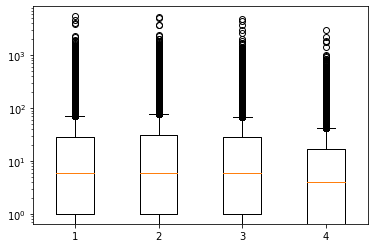

In [9]:
plt.boxplot([df_201902.På_201902,df_201903.På_201903,df_202002.På_202002,df_202003.På_202003])
plt.yscale("log")

In [10]:
#df_201902 = df_201902[df_201902.På_201902 <= 100]
#df_201903 = df_201903[df_201903.På_201903 <= 100]
#df_202002 = df_202002[df_202002.På_202002 <= 100]
#df_202003 = df_202003[df_202003.På_202003 <= 100]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

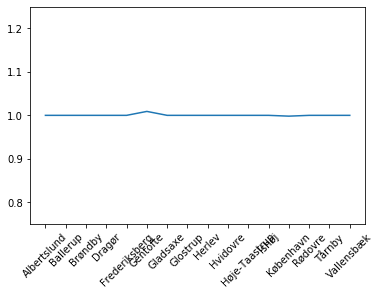

In [11]:
#Checking if there is the same amount of stops per municipality between february 2020 and march 2020

df_tempFeb = df_202002[df_202002.Kommune.isin(sel_mun)].groupby("Kommune").size()
df_tempMar = df_202003[df_202003.Kommune.isin(sel_mun)].groupby("Kommune").size()

plt.plot(df_tempFeb/df_tempMar)
plt.ylim(0.75,1.25)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

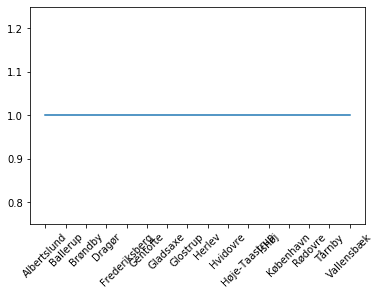

In [12]:
#Checking if there is the same amount of stops per municipality between february 2020 and march 2020

df_tempMar19= df_202003[df_202003.Kommune.isin(sel_mun)].groupby("Kommune").size()
df_tempMar20 = df_202003[df_202003.Kommune.isin(sel_mun)].groupby("Kommune").size()

plt.plot(df_tempMar19/df_tempMar20)
plt.ylim(0.75,1.25)
plt.xticks(rotation=45)

(array([7923., 1401.,  727.,  421.,  315.,  219.,  160.,  125.,  106.,
          93.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

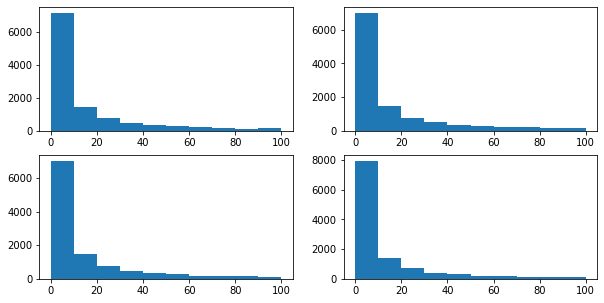

In [13]:
df_temp1 = df_201902.copy()[df_201902.På_201902 <= 100]
df_temp2 = df_201903.copy()[df_201903.På_201903 <= 100]
df_temp3 = df_202002.copy()[df_202002.På_202002 <= 100]
df_temp4 = df_202003.copy()[df_202003.På_202003 <= 100]

plt.figure(figsize=(10,5))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


ax1.hist(df_temp1.På_201902)
ax2.hist(df_temp2.På_201903)
ax3.hist(df_temp3.På_202002)
ax4.hist(df_temp4.På_202003)

In [14]:
passenger_df = df_201902.groupby(["Kommune"]).mean().loc[sel_mun]

passenger_df = passenger_df.join(df_201903.groupby(["Kommune"]).mean().loc[sel_mun],
                                 on="Kommune")
passenger_df = passenger_df.join(df_202002.groupby(["Kommune"]).mean().loc[sel_mun],
                                 on="Kommune")
passenger_df = passenger_df.join(df_202003.groupby(["Kommune"]).mean().loc[sel_mun],
                                 on="Kommune")

In [15]:
passenger_df

,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003
Kommune,,,,,,,,
Albertslund,20.964286,21.683036,25.084821,25.406250,22.808036,22.477679,11.183036,11.799107
Ballerup,43.322368,43.322368,44.401316,45.013158,43.306189,43.218241,25.032573,25.723127
Brøndby,31.015152,31.479798,33.020202,33.994949,30.386935,30.507538,19.673367,19.562814
Dragør,18.159664,18.672269,17.235294,22.008403,17.181034,17.250000,10.793103,11.198276
Frederiksberg,142.439024,142.845528,137.872587,143.505792,107.879845,110.767442,58.980620,60.480620
Gentofte,26.847418,27.774648,28.738208,30.150943,28.289238,28.800448,16.020362,16.427602
Gladsaxe,57.394137,57.394137,56.837134,55.902280,48.866295,49.058496,29.651811,30.740947
Glostrup,75.394366,75.788732,77.852113,75.654930,73.489655,76.151724,44.475862,45.531034
Herlev,56.010695,57.641711,55.037433,56.085561,55.892045,58.681818,33.267045,34.482955


# Normalised with population per municipality

In [16]:
def ageInt(x):
    return (int(x.split()[0]))

In [19]:
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data/'

popu = pd.read_excel(os.path.join(path,"Data_aldersfordeling.xlsx"))

popu['Age'] = popu['Age'].apply(ageInt)

popu = popu.groupby("Municipality").sum()

popu = popu.loc[sel_mun][["Number"]]

popu.columns = ["Population"]

In [20]:
import os
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data/'

popu_mun = pd.read_excel(os.path.join(path,"Data_aldersfordeling.xlsx"))

popu_mun['Age'] = popu_mun['Age'].apply(ageInt)

popu_mun = popu_mun.groupby("Municipality").sum()

popu_mun = popu_mun.loc[sel_mun][["Number"]]

popu_mun.columns = ["Population"]

norm_passenger_df = passenger_df.div(popu_mun["Population"],0)*10000

norm_passenger_df

,På_201902,Af_201902,På_201903,Af_201903,På_202002,Af_202002,På_202003,Af_202003
Kommune,,,,,,,,
Albertslund,7.559874,7.819060,9.045769,9.161678,8.224743,8.105614,4.032684,4.254844
Ballerup,8.913701,8.913701,9.135697,9.261586,8.910372,8.892276,5.150523,5.292607
Brøndby,8.838744,8.971159,9.410146,9.687931,8.659714,8.694083,5.606545,5.575040
Dragør,12.529091,12.882758,11.891330,15.184492,11.853894,11.901476,7.446601,7.726146
Frederiksberg,13.656011,13.694984,13.218215,13.758285,10.342730,10.619572,5.654630,5.798439
Gentofte,3.587788,3.711700,3.840466,4.029259,3.780467,3.848784,2.140901,2.195323
Gladsaxe,8.286526,8.286526,8.206106,8.071133,7.055282,7.083032,4.281108,4.438357
Glostrup,32.598740,32.769255,33.661412,32.711402,31.775188,32.926204,19.230310,19.686542
Herlev,19.345386,19.908718,19.009233,19.371244,19.304406,20.267958,11.490017,11.909976


# Normalised in relation to february and march 2019

In [21]:
feb_norm_passenger_df = passenger_df.div(passenger_df["På_201902"],0)*100

mar_norm_passenger_df = passenger_df.div(passenger_df["På_201903"],0)*100

mar_norm_passenger_df

month_norm_passenger_df = feb_norm_passenger_df[["På_201902","På_202002"]].merge(mar_norm_passenger_df[["På_201903","På_202003"]],on="Kommune")

month_norm_passenger_df

,På_201902,På_202002,På_201903,På_202003
Kommune,,,,
Albertslund,100.0,108.794719,100.0,44.580886
Ballerup,100.0,99.962653,100.0,56.377999
Brøndby,100.0,97.974484,100.0,59.579789
Dragør,100.0,94.610972,100.0,62.622102
Frederiksberg,100.0,75.737562,100.0,42.779077
Gentofte,100.0,105.370423,100.0,55.745864
Gladsaxe,100.0,85.141615,100.0,52.169785
Glostrup,100.0,97.473669,100.0,57.128651
Herlev,100.0,99.788166,100.0,60.444399


# Difference in feb and march for 2019 and 2020

In [22]:
dif_df = pd.DataFrame()

dif_df["dif_2019"] = (passenger_df.På_201903-passenger_df.På_201902).div(passenger_df.På_201902)*100

dif_df["dif_2020"] = (passenger_df.På_202003-passenger_df.På_202002).div(passenger_df.På_202002)*100

dif_df["per_2019"] = (passenger_df.På_201903).div(passenger_df.På_201902)*100

dif_df["per_2020"] = (passenger_df.På_202003).div(passenger_df.På_202002)*100

dif_df["per_feb"] = (passenger_df.På_201902-passenger_df.På_202002).div(passenger_df.På_201902)*100

dif_df["per_mar"] = (passenger_df.På_201903-passenger_df.På_202003).div(passenger_df.På_201903)*100

dif_df["pct_drop_2020"] = ((passenger_df.På_202002)-(passenger_df.På_202003))/(passenger_df.På_202002)


dif_df

,dif_2019,dif_2020,per_2019,per_2020,per_feb,per_mar,pct_drop_2020
Kommune,,,,,,,
Albertslund,19.655026,-50.968878,119.655026,49.031122,-8.794719,55.419114,0.509689
Ballerup,2.490509,-42.196314,102.490509,57.803686,0.037347,43.622001,0.421963
Brøndby,6.464745,-35.257152,106.464745,64.742848,2.025516,40.420211,0.352572
Dragør,-5.090236,-37.180130,94.909764,62.819870,5.389028,37.377898,0.371801
Frederiksberg,-3.205889,-45.327489,96.794111,54.672511,24.262438,57.220923,0.453275
Gentofte,7.042725,-43.369411,107.042725,56.630589,-5.370423,44.254136,0.433694
Gladsaxe,-0.970488,-39.320527,99.029512,60.679473,14.858385,47.830215,0.393205
Glostrup,3.259854,-39.480105,103.259854,60.519895,2.526331,42.871349,0.394801
Herlev,-1.737636,-40.479821,98.262364,59.520179,0.211834,39.555601,0.404798


# Merch monthly and yearly difference dataframes

In [23]:
df_all = month_norm_passenger_df.merge(dif_df,on="Kommune")

# Save for choropleth maps

In [24]:
import os

path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Transport_vs_covid19/Data/'

dif_df.to_csv(os.path.join(path,"passenger_decrease.csv"),encoding="utf-8",sep=",")

# Create plot for non-normalised data

In [25]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool
from bokeh.transform import dodge
import bokeh.palettes
import math
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [26]:
#Creating format fitting for bokeh
source = ColumnDataSource(passenger_df)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[8][0::2]

bar ={} # to store vbars

In [27]:
#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Barchart of average number of onboarding passengers',
           x_axis_label='Municipalities',
           y_axis_label='Avg. number of boarding passengers',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
boardings = ["På_201902","På_201903","På_202002","På_202003"]


#Generating barcharts to p 
for indx,i in enumerate(boardings):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)
    
p.xaxis.major_label_orientation = math.pi/4

In [28]:
legend_names = {"På_201902":"Onboarding February 2019","På_201903":"Onboarding March 2019",
                "På_202002":"Onboarding February 2020","På_202003":"Onboarding March 2020",
                "Af_201902":"Offboarding February 2019","Af_201903":"Offboarding March 2019",
                "Af_202002":"Offboarding February 2020","Af_202003":"Offboarding March 2020"}

items = [(legend_names[i],[bar[i]]) for i in boardings] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,90)) # Creating legends with 'items'
p.add_layout(legend,'left') # Adding legends to ´p´ and setting location. 


In [29]:
p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)

# Create plot for normalised data

In [30]:
#Creating format fitting for bokeh
source = ColumnDataSource(norm_passenger_df)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[8][0::2]

bar ={} # to store vbars


In [31]:
#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Barchart of average number of onboarding passengers',
           x_axis_label='Hour of day',
           y_axis_label='Frequency',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
boardings = ["På_201902","På_201903","På_202002","På_202003"]


#Generating barcharts to p 
for indx,i in enumerate(boardings):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)
    
p.xaxis.major_label_orientation = math.pi/4

In [32]:
legend_names = {"På_201902":"Passengers on in February 2019","På_201903":"Passengers on in March 2019",
                "På_202002":"Passengers on in February 2020","På_202003":"Passengers on in March 2020",
                "Af_201902":"Passengers off in February 2019","Af_201903":"Passengers off in March 2019",
                "Af_202002":"Passengers off in February 2020","Af_202003":"Passengers off in March 2020"}

items = [(legend_names[i],[bar[i]]) for i in boardings] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,90)) # Creating legends with 'items'
p.add_layout(legend,'left') # Adding legends to ´p´ and setting location. 

In [33]:
p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)

In [34]:
#Creating format fitting for bokeh
source = ColumnDataSource(dif_df)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[8][0::2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Passengers in march in relation to february in 2019 and 2020',
           x_axis_label='Municipalities',
           y_axis_label='Ratio',
           plot_width=950,plot_height=400,
           toolbar_location=None)

#List of on - and offboarding passengers in february and march for 2019 and 2020
years = ["per_2019","per_2020","dif_2020_2019"]


#Generating barcharts to p 
for indx,i in enumerate(years):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)
    
p.xaxis.major_label_orientation = math.pi/4

legend_names = {"per_2019":"Mar 2019 / Feb 2019",
                "per_2020":"Mar 2020 / Feb 2020",
                "dif_2020_2019":"Difference in percentage points"}

items = [(legend_names[i],[bar[i]]) for i in years] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,198)) # Creating legends with 'items'
p.add_layout(legend,'right') # Adding legends to ´p´ and setting location. 

p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "dif_2020_2019" (closest match: "dif_2020") [renderer: GlyphRenderer(id=1284, glyph=VBar(id='1282', ...), ...)]


#  Plotting of differences between february and march

In [35]:
#Creating format fitting for bokeh
source = ColumnDataSource(dif_df)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[8][0::2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Passengers in march in relation to february in 2019 and 2020',
           x_axis_label='Municipalities',
           y_axis_label='%',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
years = ["per_2019","per_2020"]


#Generating barcharts to p 
for indx,i in enumerate(years):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)
    
p.xaxis.major_label_orientation = math.pi/4

legend_names = {"per_2019":"Mar 2019 / Feb 2019  %",
                "per_2020":"Mar 2020 / Feb 2020 %"}

items = [(legend_names[i],[bar[i]]) for i in years] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,90)) # Creating legends with 'items'
p.add_layout(legend,'left') # Adding legends to ´p´ and setting location. 

p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)

# Plot with both % difference between months and years

In [36]:
#Creating format fitting for bokeh
source = ColumnDataSource(df_all)

#Creating a list for the x-axis on the bar-chart. 
x_range = [str(h) for h in source.data['Kommune']]

#Generating 14 colors for the different focus crimes  
colors = bokeh.palettes.Category20[8][0::2]

bar ={} # to store vbars

#Creating figure frame with title, x -and y labels and disabling toolbar. 
p = figure(x_range=FactorRange(factors=x_range),
           title='Measures of change in passengers per municipality',
           x_axis_label='Municipalities',
           y_axis_label='%',
           plot_width=950,plot_height=500)

#List of on - and offboarding passengers in february and march for 2019 and 2020
plots = ["På_202002","På_202003","per_2019","per_2020"]


#Generating barcharts to p 
for indx,i in enumerate(plots):
    bar[i] = p.vbar("Kommune",  top=i, source= source, width=0.8, 
                 fill_alpha=0.5,line_color=None,
                 color=colors[indx],visible=False)
    
p.xaxis.major_label_orientation = math.pi/4

legend_names = {"På_202002":"Passengers in Feb 2020 / Feb 2019 in %",
                "På_202003":"Passengers in Mar 2020 / Mar 2019 in %",
                "per_2019":"Mar 2019 / Feb 2019  %",
                "per_2020":"Mar 2020 / Feb 2020 %"}

items = [(legend_names[i],[bar[i]]) for i in plots] #Creating list of tuples with focus crime name and belonging bar chart.
legend = Legend(items=items,location=(0,90)) # Creating legends with 'items'
p.add_layout(legend,'left') # Adding legends to ´p´ and setting location. 

p.legend.click_policy="hide"
p.legend.title = 'Click on names below to see barcharts'
show(p)